## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Madhushree M
Copyright Madhushree M, 2021

In [57]:
# Imorting required libraries
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_error
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

There were 25 examples with 2 attributes

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


* There were no missing values in the data confirmed by counts.
* The disribution is close to normal as the mean and medican values are close

#### Visualization



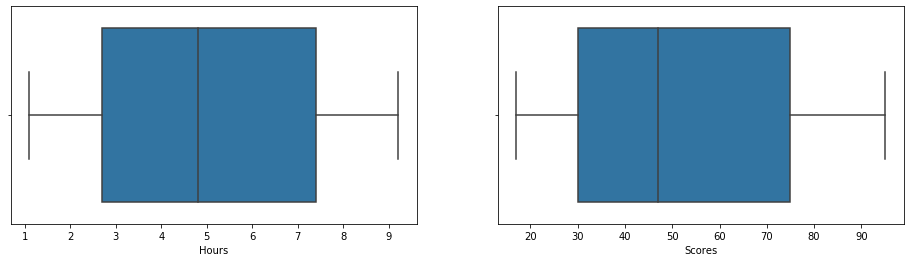

In [32]:
plt.rcParams['figure.figsize'] = (16,4)
j = 1
for i in df.columns:
    plt.subplot(1,2,j)
    sns.boxplot(df[i])
    j = j+1
plt.show()

* The distribution close to symmetric and there were no outliers noted

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

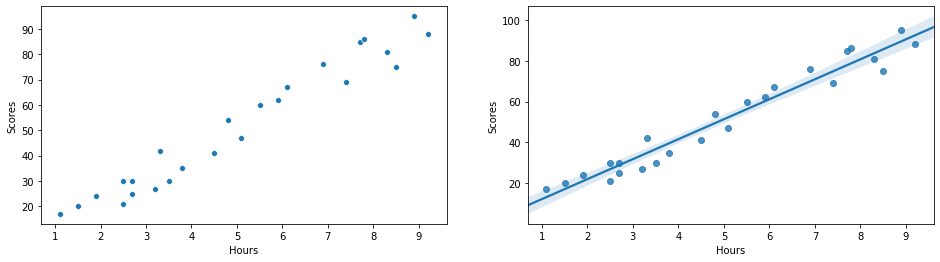

In [30]:
plt.rcParams['figure.figsize'] = (16,4)
plt.subplot(1,2,1)
sns.scatterplot(df['Hours'],df['Scores'])
plt.subplot(1,2,2)
sns.regplot(df['Hours'],df['Scores'])
plt.show()

**From the graph above, we can clearly see that there is a positive linear trend between the number of hours studied and percentage of score.**

## Data Preparation

In [40]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2021)

print('X Train shape: ',x_train.shape)
print('X Test shape: ',x_test.shape)
print('Y Train shape: ',y_train.shape)
print('Y Test shape: ',y_test.shape)

X Train shape:  (20, 1)
X Test shape:  (5, 1)
Y Train shape:  (20,)
Y Test shape:  (5,)


* To make the data supplied to model we have splitted the data and their values are above

## Model Building

In [46]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Training Completed')
y_train_predict = lr.predict(x_train)
y_test_predict = lr.predict(x_test)

Training Completed


#### Predictions

In [43]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predict})   

,Actual,Predicted
0,76,69.059677
1,30,27.480467
2,85,76.619533
3,30,36.930287
4,25,29.370431


* The actual values were compared with predicted values.

In [55]:
# lets try to predict certain value 
hours = 9.25
pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 91.26675511159667


## Model Evaluation

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [64]:
print('Model performance on Train data')
mean_squ_error_train = mean_squared_error(y_train, y_train_predict)
mean_abs_error_train = mean_absolute_error(y_train, y_train_predict)
print("Mean Squred Error:",mean_squ_error_train)
print("Mean absolute Error:",mean_abs_error_train)
print('\n')
print('Model performance on Test data')
mean_squ_error_test = mean_squared_error(y_test, y_test_predict)
mean_abs_error_test = mean_absolute_error(y_test, y_test_predict)
print("Mean Squred Error:",mean_squ_error_test)
print("Mean absolute Error:",mean_abs_error_test)

Model performance on Train data
Mean Squred Error: 27.408117293585143
Mean absolute Error: 4.681881535820194


Model performance on Test data
Mean Squred Error: 38.37558001488644
Mean absolute Error: 5.828208209770568


* Noticed model performance was good at both Train and Test data